<a href="https://colab.research.google.com/github/taba4ek555/Diplom/blob/main/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Добавляем гугл диск в гугл колаб с готовым датасетом
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Распаковываем архив с датасетом
!unzip /content/drive/MyDrive/LFW-FER.zip -d ./


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./LFW-FER/train/neutral/Nanni_Moretti_0002.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._Nanni_Moretti_0002.jpg  
  inflating: ./LFW-FER/train/neutral/Hushiar_Zebari_0001.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._Hushiar_Zebari_0001.jpg  
  inflating: ./LFW-FER/train/neutral/Allen_Rock_0001.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._Allen_Rock_0001.jpg  
  inflating: ./LFW-FER/train/neutral/Keith_Bogans_0002.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._Keith_Bogans_0002.jpg  
  inflating: ./LFW-FER/train/neutral/John_Kerry_0017.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._John_Kerry_0017.jpg  
  inflating: ./LFW-FER/train/neutral/Maria_Soledad_Alvear_Valenzuela_0001.jpg  
  inflating: ./__MACOSX/LFW-FER/train/neutral/._Maria_Soledad_Alvear_Valenzuela_0001.jpg  
  inflating: ./LFW-FER/train/neutral/Eric_Rosser_0002.jpg  
  inflating: ./__MACOSX/LFW-FER/train/

In [3]:
#Импортирование библиотек
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn import metrics
import cv2
from sklearn.utils.class_weight import compute_class_weight

In [4]:
#Создаём словари для кодирования эмоций и списки для хранения данных
numbers_names = {0: 'negative', 1: 'neutral', 2: 'positive'}
names_numbers = {'negative': 0, 'neutral': 1, 'positive': 2}
train_images = []
train_labels = []
test_images = []
test_labels = []

Загрузка изображений


In [5]:
folders = [folder for folder in os.listdir('./LFW-FER/train')if folder[0] != '.']
for i in range(len(folders)):
    folder = folders[i]
    for image_path in os.listdir(f'./LFW-FER/train/{folder}'):
        image = Image.open(f'./LFW-FER/train/{folder}/{image_path}')
        train_images.append(np.array(image))
        train_labels.append(names_numbers[folder])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
folders = [folder for folder in os.listdir('./LFW-FER/eval')if folder[0] != '.']
for i in range(len(folders)):
    folder = folders[i]
    for image_path in os.listdir(f'./LFW-FER/eval/{folder}'):
        image = Image.open(f'./LFW-FER/eval/{folder}/{image_path}')
        test_images.append(np.array(image))
        test_labels.append(names_numbers[folder])
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
len(train_images), len(test_images)

(9330, 1157)

Пример изображений


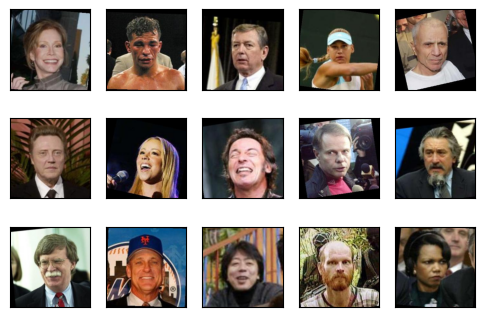

In [8]:
fig, axs = plt.subplots(3, 5, figsize=(6, 4))
for i in range(15):
    ax = axs[i // 5, i % 5]
    ax.imshow(train_images[random.randint(0, len(train_images))])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()